In [1]:
## 기본 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## 딥러닝 모듈
import tensorflow
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout
from keras.utils import to_categorical
from keras.losses import MSE
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

## 01. imdb Embedding

In [21]:
from keras.datasets import imdb
from keras.utils import pad_sequences, to_categorical
from keras.models import Sequential, Model
from keras.layers import Embedding, Flatten, Dense, Conv1D, MaxPooling1D

In [33]:
# 특성으로 사용할 단어의 수
max_features = 10000

# 정수 리스트로 데이터를 로드
(X_train, y_train), (X_test,y_test) = imdb.load_data(num_words=max_features)

In [34]:
# 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어)
maxlen = 20

# 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환
X_train = pad_sequences(X_train,maxlen=maxlen)
X_test = pad_sequences(X_test,maxlen=maxlen)

In [35]:
X_train.shape
X_test.shape

(25000, 20)

In [36]:
input_shape = X_train.shape[1]

In [37]:
model = Sequential(
    [
        Embedding(10000, 8, input_length=input_shape),
        Flatten(),
        Dense(1, activation="sigmoid")
    ]
)

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten_1 (Flatten)         (None, 160)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [39]:
optimizer = keras.optimizers.Nadam()
loss = "binary_crossentropy"
metrics = ["accuracy"]
model.compile(optimizer=optimizer,
                loss=loss,
                metrics=metrics)

In [40]:
model.fit(X_train,
            y_train,
            epochs=20,
            batch_size=512,
            validation_data=(X_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 6ms/step - loss: 0.6917 - accuracy: 0.5272 - val_loss: 0.6890 - val_accuracy: 0.5732
Epoch 2/20
49/49 [==============================] - 0s 4ms/step - loss: 0.6789 - accuracy: 0.6648 - val_loss: 0.6731 - val_accuracy: 0.6609
Epoch 3/20
49/49 [==============================] - 0s 4ms/step - loss: 0.6471 - accuracy: 0.7374 - val_loss: 0.6362 - val_accuracy: 0.7026
Epoch 4/20
49/49 [==============================] - 0s 3ms/step - loss: 0.5958 - accuracy: 0.7574 - val_loss: 0.5901 - val_accuracy: 0.7188
Epoch 5/20
49/49 [==============================] - 0s 4ms/step - loss: 0.5432 - accuracy: 0.7699 - val_loss: 0.5519 - val_accuracy: 0.7364
Epoch 6/20
49/49 [==============================] - 0s 4ms/step - loss: 0.5007 - accuracy: 0.7855 - val_loss: 0.5252 - val_accuracy: 0.7474
Epoch 7/20
49/49 [==============================] - 0s 4ms/step - loss: 0.4676 - accuracy: 0.8003 - val_loss: 0.5078 - val_accuracy: 0.7545
Epoch 8/20
49/49 [==

## 02. 1D 컨브넷 구현

In [56]:
max_features = 10000
(X_train, y_train), (X_test,y_test) = imdb.load_data(num_words=max_features)

maxlen = 500
X_train = pad_sequences(X_train,maxlen=maxlen)
X_test = pad_sequences(X_test,maxlen=maxlen)

In [57]:
X_train.shape

(25000, 500)

In [60]:
dim=100
model = Sequential(
    [
        Embedding(max_features, dim, input_length=maxlen),
        Conv1D(32,7,activation="relu"),
        MaxPooling1D(5),
        Conv1D(32,7,activation="relu"),
        Flatten(),
        Dense(1, activation="sigmoid")
    ]
)

In [61]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 500, 100)          1000000   
                                                                 
 conv1d_2 (Conv1D)           (None, 494, 32)           22432     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 98, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 flatten_4 (Flatten)         (None, 2944)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 2945      
                                                      

In [62]:
model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])

In [63]:
model.fit(X_train,
            y_train,
            epochs=20,
            batch_size=512,
            validation_data=(X_test,y_test))

Epoch 1/20
49/49 [==============================] - 39s 774ms/step - loss: 0.5771 - accuracy: 0.6819 - val_loss: 0.3806 - val_accuracy: 0.8474
Epoch 2/20
49/49 [==============================] - 39s 790ms/step - loss: 0.3234 - accuracy: 0.8661 - val_loss: 0.3415 - val_accuracy: 0.8545
Epoch 3/20
49/49 [==============================] - 39s 792ms/step - loss: 0.2471 - accuracy: 0.9021 - val_loss: 0.4898 - val_accuracy: 0.8037
Epoch 4/20
36/49 [=====================>........] - ETA: 9s - loss: 0.2141 - accuracy: 0.9180 

KeyboardInterrupt: 

In [44]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  
max_len = 500  

print('데이터 로드...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), '훈련 시퀀스')
print(len(x_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
print('x_train 크기:', x_train.shape)
print('x_test 크기:', x_test.shape)

데이터 로드...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
x_train 크기: (25000, 500)
x_test 크기: (25000, 500)


In [45]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 1)                

c:\Users\admin\anaconda3\envs\keras1\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


157/157 [==============================] - 34s 212ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 2/10
157/157 [==============================] - 34s 214ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 3/10
157/157 [==============================] - 35s 221ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 4/10
157/157 [==============================] - 36s 229ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 5/10
157/157 [==============================] - 37s 236ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 6/10
157/157 [==============================] - 41s 259ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 7/10
157/157 [==============================] - 37s 237ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 8/10
157/157 [==============================] - 38s 240ms/st

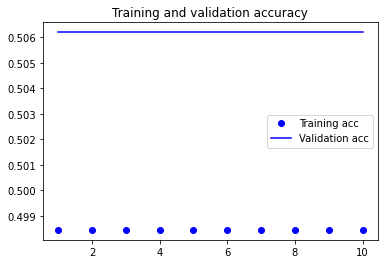

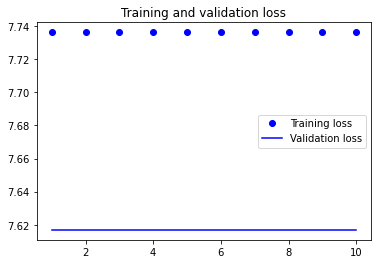

In [46]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()